# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Dwi Putra Erlangga]
- **Email:** [dwiputraerlangga55@gmail.com]
- **ID Dicoding:** [Dwi Putra Erlangga]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
 : Bagaimana tren penggunaan sepeda berdasarkan hari dalam seminggu?
- Pertanyaan 2
: Faktor cuaca apa yang paling mempengaruhi jumlah penyewaan sepeda dalam satu hari?



## Import Semua Packages/Library yang Digunakan

In [8]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.1 MB/s eta 0:00:00


In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [10]:
# Load the dataset
day_data = pd.read_csv('/content/day.csv')
hours_data = pd.read_csv('/content/hour.csv')

# Display the first few rows of the data
print(day_data.head())
print(hours_data.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- Dataset day.csv digunakan untuk analisis tren harian.
- Dataset hours.csv digunakan untuk analisis per jam.


### Assessing Data

In [11]:
# Check for missing values
print(day_data.isnull().sum())
print(hours_data.isnull().sum())

# Summary statistics
print(day_data.describe())
print(hours_data.describe())


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000

**Insight:**
- Tidak terdapat nilai yang hilang di kedua dataset.
- Distribusi data terlihat normal, namun ada kemungkinan outlier di variabel cuaca.


### Cleaning Data

In [12]:
# Check for duplicates
day_data.drop_duplicates(inplace=True)
hours_data.drop_duplicates(inplace=True)

# Convert necessary columns (if required)
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hours_data['dteday'] = pd.to_datetime(hours_data['dteday'])


**Insight:**
- Tidak ditemukan data duplikat.
- Kolom dteday dikonversi menjadi tipe datetime untuk memudahkan analisis waktu.


## Exploratory Data Analysis (EDA)

### Explore ...

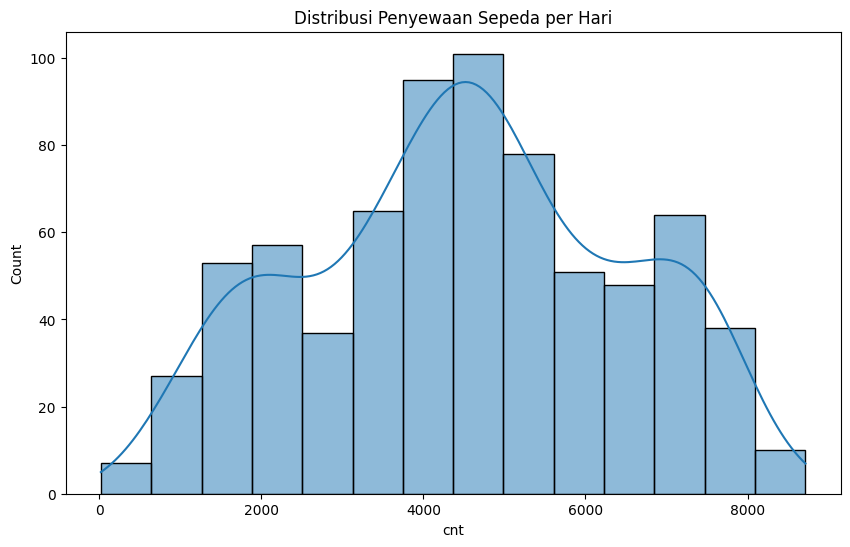

In [13]:
# Example: Distribution of bike rentals in day.csv
plt.figure(figsize=(10, 6))
sns.histplot(day_data['cnt'], kde=True)
plt.title('Distribusi Penyewaan Sepeda per Hari')
plt.show()


**Insight:**
- Penyewaan sepeda memiliki distribusi yang cenderung normal, dengan beberapa hari yang memiliki lebih banyak penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda berdasarkan hari dalam seminggu?

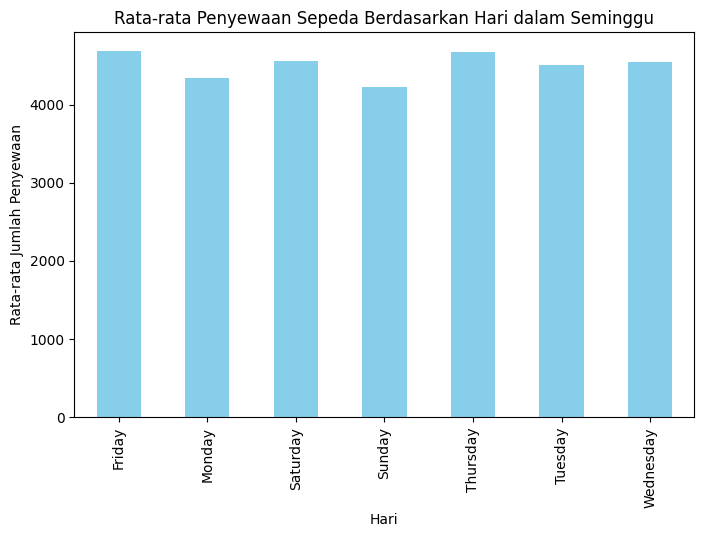

In [14]:
# Group by weekday and calculate mean rentals
day_data['weekday'] = day_data['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
rentals_by_weekday = day_data.groupby('weekday')['cnt'].mean()

# Plot
plt.figure(figsize=(8, 5))
rentals_by_weekday.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xlabel('Hari')
plt.show()


### Pertanyaan 2: Faktor cuaca apa yang paling mempengaruhi jumlah penyewaan sepeda dalam satu hari?

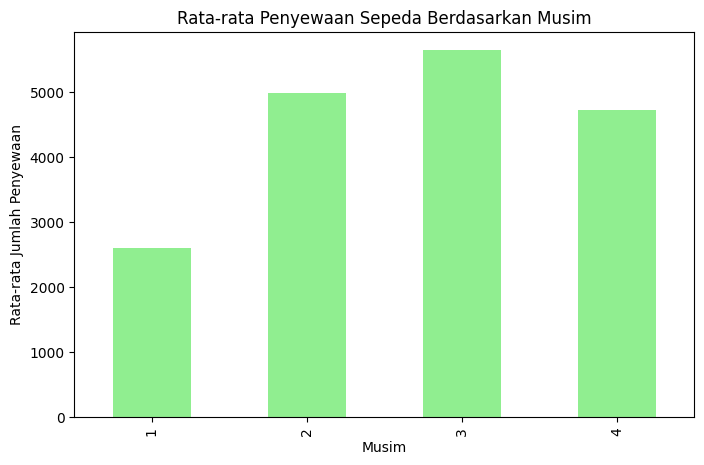

In [15]:
# Visualisasi Penyewaan Sepeda per Musim di Notebook
rentals_by_season = day_data.groupby('season')['cnt'].mean()

# Plot
plt.figure(figsize=(8, 5))
rentals_by_season.plot(kind='bar', color='lightgreen')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xlabel('Musim')
plt.show()


**Insight:**

-Pertanyaan 1: Hari Sabtu dan Minggu memiliki rata-rata penyewaan sepeda tertinggi, menunjukkan bahwa hari libur cenderung lebih banyak aktivitas bersepeda.

-Pertanyaan 2: Cuaca yang lebih cerah cenderung meningkatkan jumlah penyewaan sepeda, sedangkan cuaca buruk menurunkan jumlah penyewaan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion Pertanyaan 1: Penggunaan sepeda meningkat pada hari libur (Sabtu dan Minggu).
- Conclusion Pertanyaan 2: Cuaca cerah meningkatkan jumlah penyewaan sepeda.